In [20]:
import numpy as np
import os
import glob
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
date="05122019" #defining the date for saving files later
wd= os.getcwd()

In [22]:
allyes=glob.glob("../data/raw/yes/"+'*.[pjJ][npP][gG]') #grabs all jpg and png files
allno=glob.glob("../data/raw/no/"+'*.[pjJ][npP][gG]')

In [23]:
#can load with:
X=np.load("../data/processed/%s_X.npy"%(date))
y=np.load("../data/processed/%s_y.npy"%(date))

(50, 50)

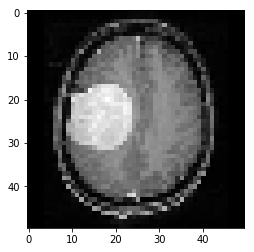

In [24]:
img = X[0]
img = cv2.resize(img,(50,50))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray,cmap='gray', vmin=0, vmax=1)
gray.reshape((len(gray), -1)).T.shape

In [25]:
resX=[]
xres = 50
yres = 50
resizeval = (xres,yres)
# resize and convert to grayscale
for img in X:
    img = cv2.resize(img,resizeval)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = gray.reshape((len(gray), -1)).T
    resX.append(gray)

resX = np.array(resX)
#resX = resX.reshape((len(resX), -1)).T
resX = resX.reshape(-1, xres,yres, 1)

X = resX
#y = y.T
y = y.astype('float32')

In [26]:
X.shape

(247, 50, 50, 1)

In [27]:
y.shape

(247, 2)

In [28]:
from sklearn.model_selection import train_test_split
train_X0,test_X,train_label0,test_label = train_test_split(X, y, test_size=0.2, random_state=13)
train_X,valid_X,train_label,valid_label = train_test_split(train_X0, train_label0, test_size=0.2, random_state=13)

In [29]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [30]:
batch_size = 64
epochs = 20
num_classes = 2

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(xres,yres,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [32]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 128)       73856     
__________

In [34]:
train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 157 samples, validate on 40 samples
Epoch 1/20
157/157 [==============================] - 1s 9ms/step - loss: 0.6691 - acc: 0.4968 - val_loss: 0.5877 - val_acc: 0.7250
Epoch 2/20
157/157 [==============================] - 1s 3ms/step - loss: 0.6285 - acc: 0.6306 - val_loss: 0.6206 - val_acc: 0.7750
Epoch 3/20
157/157 [==============================] - 1s 3ms/step - loss: 0.5982 - acc: 0.6879 - val_loss: 0.5613 - val_acc: 0.7750
Epoch 4/20
157/157 [==============================] - 1s 4ms/step - loss: 0.5777 - acc: 0.6497 - val_loss: 0.6078 - val_acc: 0.7500
Epoch 5/20
157/157 [==============================] - 1s 4ms/step - loss: 0.5393 - acc: 0.7006 - val_loss: 0.8070 - val_acc: 0.5000
Epoch 6/20
157/157 [==============================] - 1s 4ms/step - loss: 0.5389 - acc: 0.6561 - val_loss: 0.6689 - val_acc: 0.7500
Epoch 7/20
157/157 [==============================] - 1s 4ms/step - loss: 0.5183 - acc: 0.7580 - val_loss: 0.7398 - val_acc: 0.5250
Epoch 8/20
157/157 [===========

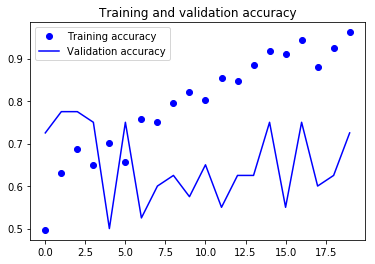

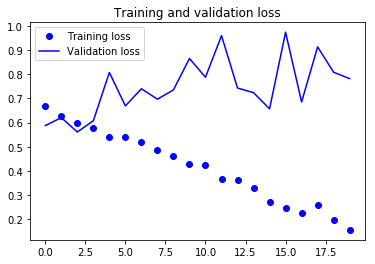

In [35]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
test_eval = model.evaluate(test_X, test_label, verbose=0)

In [37]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4812097889184952
Test accuracy: 0.88
